# Exoplanet Hunting in Deep Space

In [1]:
import reservoirpy as rpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import pylab

from pylab import sqrt
from reservoirpy.datasets import japanese_vowels
from reservoirpy import set_seed, verbosity
from reservoirpy.observables import nrmse, rsquare

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve

import seaborn as sns
from sklearn.metrics import confusion_matrix

Data - https://www.kaggle.com/datasets/keplersmachines/kepler-labelled-time-series-data

## 1. Understanding the Data

In [2]:
test = pd.read_csv(r'C:\Users\Fitzpatrick\Downloads\exoTest.csv')
train = pd.read_csv(r'C:\Users\Fitzpatrick\Downloads\exoTrain.csv')
train

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0         2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1         2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2         2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3         2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4         2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   
...     ...      ...      ...      ...      ...      ...      ...     ...   
5082      1   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   
5083      1   989.75   891.01   908.53   851.83   755.11   615.78  595.77   
5084      1   273.39   278.00   261.73   236.99   280.73   264.90  252.92   
5085      1     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85   
5086      1   323.28   306.36   293.16   287.67   249.89   218.30  188.86   

       FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0      -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1      -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2      486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3      311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4    -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   
...       ...     ...  ...        ...        ...        ...        ...   
5082   -49.25  -30.92  ...     139.95     147.26     156.95     155.64   
5083   458.87  492.84  ...     -26.50      -4.84     -76.30     -37.84   
5084   254.88  237.60  ...     -26.82     -53.89     -48.71      30.99   
5085    -0.03    3.28  ...      10.86      -3.23      -5.10      -4.61   
5086   178.93  118.93  ...      71.19       0.97      55.20      -1.63   

      FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0         48.57      92.54      39.32      61.42       5.08     -39.54  
1         -4.86       0.76     -11.70       6.46      16.00      19.93  
2        -20.88       5.06     -11.80     -28.91     -70.02     -96.67  
3         20.03     -12.67      -8.77     -17.31     -17.35      13.98  
4       -443.76    -438.54    -399.71    -384.65    -411.79    -510.54  
...         ...        ...        ...        ...        ...        ...  
5082     156.36     151.75     -24.45     -17.00       3.23      19.28  
5083    -153.83    -136.16      38.03     100.28     -45.64      35.58  
5084      15.96      -3.47      65.73      88.42      79.07      79.43  
5085      -9.82      -1.50      -4.65     -14.55      -6.41      -2.55  
5086      -5.50     -25.33     -41.31     -16.72     -14.09      27.82  

[5087 rows x 3198 columns]

Data from stars from the kepler NASA space telescope - their change in light intensity over time and a binary label - label 2 implies there is at lest one exoplanet in orbit of the star

The training set has data from 5087 stars. There is 37 confirmed exoplants in this dataset

The test set has data from 570 stars and there is 5 exoplanets to detect in this data set

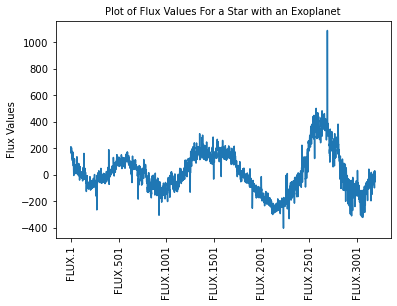

In [15]:
exampleexo = train.loc[5]
exampleexo = exampleexo.drop(['LABEL'])
exampleexo.plot()
plt.title('Plot of Flux Values For a Star with an Exoplanet',fontsize=10)
plt.ylabel('Flux Values', fontsize = 10)
plt.xticks(rotation=90)
plt.savefig("planet1.svg", format ='svg')

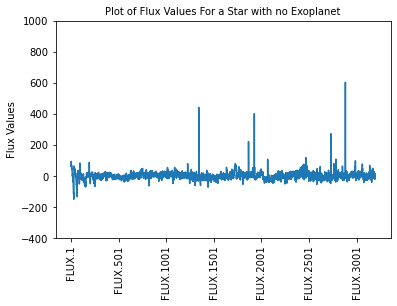

In [16]:
examplenoexo = train.loc[3480]
examplenoexo = examplenoexo.drop(['LABEL'])
examplenoexo.plot()
plt.title('Plot of Flux Values For a Star with no Exoplanet',fontsize=10)
plt.ylabel('Flux Values', fontsize = 10)
plt.xticks(rotation=90)
plt.ylim(-400,1000)
plt.savefig("planet2.svg", format ='svg')

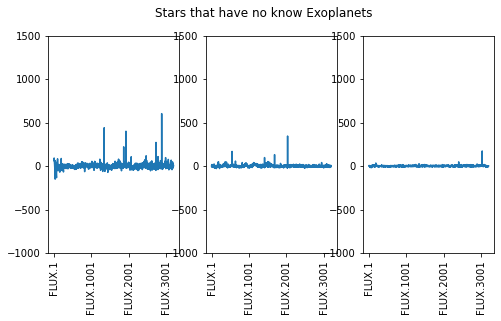

In [78]:
noplanet1 = train.loc[3480]
noplanet1 = noplanet1.drop(['LABEL'])
noplanet2 = train.loc[271]
noplanet2 = noplanet2.drop(['LABEL'])
noplanet3 = train.loc[2679]
noplanet3 = noplanet3.drop(['LABEL'])
planet1 = train.loc[5]
planet1 = planet1.drop(['LABEL'])
planet2 = train.loc[2]
planet2 = planet2.drop(['LABEL'])
planet3 = train.loc[34]
planet3 = planet3.drop(['LABEL'])

fig_width_pt = 246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean

fig = plt.subplots(1,3,figsize=(8,4), sharey = True)

plt.subplot(1, 3, 1)
noplanet1.plot()
plt.ylim(-1000,1500)
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
noplanet2.plot()
plt.ylim(-1000,1500)
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
noplanet3.plot()
plt.ylim(-1000,1500)
plt.xticks(rotation=90)

plt.suptitle("Stars that have no know Exoplanets")
plt.savefig("Stars_with_noexoplot.svg", format ='svg')
plt.show()

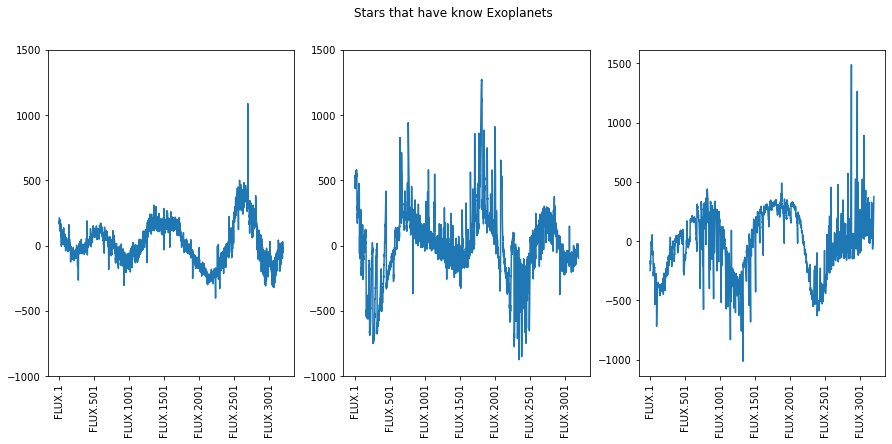

In [68]:
fig = plt.subplots(1,3,figsize=(15,6), sharey = True)

plt.subplot(1, 3, 1)
planet1.plot()
plt.ylim(-1000,1500)
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
planet2.plot()
plt.ylim(-1000,1500)
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
planet3.plot()
plt.xticks(rotation=90)

plt.suptitle("Stars that have know Exoplanets")
plt.savefig("Stars_with_exoplot.svg", format ='svg')
plt.show()

In [5]:
#exoplanets = train.loc[0:36]
#exoplanets.drop(['LABEL'], axis = 1)
#maybe going to try do something more interesing here - boxplot of all the values or some idk

## 2. Implementing RC

This is a simpel echo state network - following tutorial on git https://github.com/reservoirpy/

In [3]:
from reservoirpy.nodes import Reservoir, Ridge, Input

For training we need our data to be a list of arrays not a data frame

In [37]:
X_train1 = train
X_train1 = X_train1.drop(['LABEL'], axis = 1)
n = len(X_train1)
X_train = []
for i in range(n):
    x = X_train1.iloc[i].to_numpy()
    X_train.append(x)
    
X_test1 = test
X_test1 = X_test1.drop(['LABEL'], axis = 1)
n = len(X_test1)
X_test = []
for i in range(n):
    x = X_test1.iloc[i].to_numpy()
    X_test.append(x)

In [38]:
#training sets will be [1,0] if no exoplanet
#and [0,1] if there is an exoplanet
Y_train1 = train[['LABEL']].copy()
n = len(Y_train1)
Y_train = []
for i in range(n):
    if Y_train1.loc[i,'LABEL'] == 1:
        x = np.array([1,0])
        Y_train.append(x)
    elif Y_train1.loc[i,'LABEL'] == 2:
        x = np.array([0,1])
        Y_train.append(x)

Y_test1 = test[['LABEL']].copy()
n = len(Y_test1)
Y_test = []
for i in range(n):
    if Y_test1.loc[i,'LABEL'] == 1:
        x = np.array([1,0])
        Y_test.append(x)
    elif Y_test1.loc[i,'LABEL'] == 2:
        x = np.array([0,1])
        Y_test.append(x)

In [20]:
type(X_train) 

NameError: name 'X_train' is not defined

This is a sequence to vector model, and this is usually the type of model we refer to when talking about classification of sequencial patterns.

In [10]:
source = Input()
reservoir = Reservoir(1000, sr=0.5, lr=0.5, seed = 1234)
readout = Ridge(ridge=1e-6)

model = source >> reservoir >> readout

In [11]:
states_train = []
for x in X_train:
    states = reservoir.run(x, reset=True)
    states_train.append(states[-1, np.newaxis])

Running Reservoir-0: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1001.27it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.25it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.42it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.13it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|██████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 880.05it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 59.93it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.48it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 61.68it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Reservoir-0: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


In [12]:
readout.fit(states_train, Y_train)

'Ridge-0': Ridge(ridge=1e-06, input_bias=True, in=1000, out=2)

In [13]:
Y_pred = []
for x in X_test:
    states = reservoir.run(x, reset=True)
    y = readout.run(states[-1, np.newaxis])
    Y_pred.append(y)

Running Ridge-0: 100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Ridge-0: 100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Ridge-0: 100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Ridge-0: 100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Ridge-0: 100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Ridge-0: 100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Ridge-0: 100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Ridge-0: 100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Running Ridge-0: 100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


In [14]:
Y_pred_class = [np.argmax(y_p) for y_p in Y_pred]
Y_test_class = [np.argmax(y_t) for y_t in Y_test]

score = accuracy_score(Y_test_class, Y_pred_class)

print("Total Accuracy: ", f"{score * 100:.3f} %")

Total Accuracy:  99.123 %


In [15]:
Y_pred_class

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [16]:
Y_test

[array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([1, 0]),
 array([

### SMOTE

In [22]:
%%capture

from imblearn.over_sampling import SMOTE

model = SMOTE()
x_train_res,y_train_res = model.fit_resample(train.drop('LABEL',axis=1), train['LABEL'])
y_train_res = y_train_res.astype('int')

y_train_res.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')

X_train1_res = x_train_res
n = len(X_train1_res)
X_train_res = []
for i in range(n):
    x = X_train1_res.iloc[i].to_numpy()
    X_train_res.append(x)
    
X_test1 = test
X_test1 = X_test1.drop(['LABEL'], axis = 1)
n = len(X_test1)
X_test = []
for i in range(n):
    x = X_test1.iloc[i].to_numpy()
    X_test.append(x)

Y_train1_res = y_train_res
n = len(Y_train1_res)
Y_train_res = []
for i in range(n):
    if Y_train1_res.loc[i] == 1:
        x = np.array([1,0])
        Y_train_res.append(x)
    elif Y_train1_res.loc[i] == 2:
        x = np.array([0,1])
        Y_train_res.append(x)

Y_test1 = test[['LABEL']].copy()
n = len(Y_test1)
Y_test = []
for i in range(n):
    if Y_test1.loc[i,'LABEL'] == 1:
        x = np.array([1,0])
        Y_test.append(x)
    elif Y_test1.loc[i,'LABEL'] == 2:
        x = np.array([0,1])
        Y_test.append(x)
        
source = Input()
reservoir = Reservoir(1000, sr=0.1, lr=0.5, seed = 123)
readout = Ridge(ridge=1e-6)
model = source >> reservoir >> readout

states_train = []
for x in X_train_res:
    states = reservoir.run(x, reset=True);
    states_train.append(states[-1, np.newaxis]);
    
readout.fit(states_train, Y_train_res)
    
Y_pred = []
for x in X_test:
    states = reservoir.run(x, reset=True);
    y = readout.run(states[-1, np.newaxis]);
    Y_pred.append(y)
    

In [ ]:
plt.figure(figsize=(5,3.5))
sns.heatmap(confusion_matrix(Y_test_class,Y_pred_class),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=10)
plt.savefig("ConfusionMatrix.svg", format ='svg')

In [56]:
#fpr,tpr,thresholds = roc_curve(Y_test,Y_pred)
#plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
#plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
#plt.legend(loc = "best")
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

### Cross Validation

Going to use Stratified k-fold cross validation to evalute this model - training on the testing set and testing on the testing set does not make any useful predictions

In [17]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [18]:
sk_folds = StratifiedKFold(n_splits = 10)

scores = cross_val_score(clf, X, y, cv = sk_folds)

NameError: name 'clf' is not defined

In [ ]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

I don't think sklearn cv is going to work - could use it for splitting up the data and stuff but I might have to write my own cv loop 

## 3. Hyperparameter Optimization

Code works but prediction is shite. Need to try optimization of parameters or some kind of crossvalidation in the learning. Both together hopefully kfold like is used in the tutorial

In [43]:
# Objective functions accepted by ReservoirPy must respect some conventions:
#  - dataset and config arguments are mandatory, like the empty '*' expression.
#  - all parameters that will be used during the search must be placed after the *.
#  - the function must return a dict with at least a 'loss' key containing the result
# of the loss function. You can add any additional metrics or information with other 
# keys in the dict. See hyperopt documentation for more informations.
def objective(dataset, config, *, iss, N, sr, lr, ridge, seed):
    
    # This step may vary depending on what you put inside 'dataset'
    train_data, validation_data = dataset
    X_train, y_train = train_data
    X_val, y_val = validation_data
    
    # You can access anything you put in the config 
    # file from the 'config' parameter.
    instances = config["instances_per_trial"]
    
    # The seed should be changed across the instances, 
    # to be sure there is no bias in the results 
    # due to initialization.
    variable_seed = seed 
    
    accuracies = [];
    for n in range(instances):
        # Build your model given the input parameters
        reservoir = Reservoir(N, 
                              sr=sr, 
                              lr=lr, 
                              inut_scaling=iss, 
                              seed=variable_seed)
        
        source = Input()
        readout = Ridge(ridge=1e-7)
        model = source >> reservoir >> readout
        
        states_train = []
        for x in X_train:
            states = reservoir.run(x, reset=True)
            states_train.append(states[-1, np.newaxis])
        
        readout.fit(states_train, Y_train)
        
        Y_pred = []
        for x in X_test:
            states = reservoir.run(x, reset=True)
            y = readout.run(states[-1, np.newaxis])
            Y_pred.append(y)
            
        Y_pred_class = [np.argmax(y_p) for y_p in Y_pred]
        Y_test_class = [np.argmax(y_t) for y_t in Y_test]
        accuracy = accuracy_score(Y_test_class, Y_pred_class)
        
        variable_seed += 1
        
        accuracies.append(accuracy)

    # Return a dictionnary of metrics. The 'loss' key is mandatory when
    # using hyperopt.
    return {'Accuracy': np.mean(accuracies)/100}

In [40]:
hyperopt_config = {
    "exp": f"hyperopt-reservoir", # the experimentation name
    "hp_max_evals": 200,             # the number of differents sets of parameters hyperopt has to try
    "hp_method": "random",           # the method used by hyperopt to chose those sets (see below)
    "seed": 42,                      # the random state seed, to ensure reproducibility
    "instances_per_trial": 3,        # how many random ESN will be tried with each sets of parameters
    "hp_space": {                    # what are the ranges of parameters explored
        "N": ["choice", 500],             # the number of neurons is fixed to 500
        "sr": ["loguniform", 1e-2, 10],   # the spectral radius is log-uniformly distributed between 1e-2 and 10
        "lr": ["loguniform", 1e-3, 1],  # idem with the leaking rate, from 1e-3 to 1
        "iss": ["choice", 0.9],           # the input scaling is fixed
        "ridge": ["choice", 1e-7],        # and so is the regularization parameter.
        "seed": ["choice", 1234]          # an other random seed for the ESN initialization
    }
}


import json

# we precautionously save the configuration in a JSON file
# each file will begin with a number corresponding to the current experimentation run number.
with open(f"{hyperopt_config['exp']}.config.json", "w+") as f:
    json.dump(hyperopt_config, f)

In [41]:
dataset = ((X_train, Y_train), (X_test, Y_test))

In [44]:
from reservoirpy.hyper import research

best = research(objective, dataset, f"{hyperopt_config['exp']}.config.json", ".")

  0%|                                                                          | 0/200 [00:00<?, ?trial/s, best loss=?]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|     


Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|         

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|      

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-9:   0%|                                                                       | 0/1 [00:00<?, ?it/s]

Running Ridge-9:   0%|                                                                           | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|     


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|    


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-10:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-10:   0%|        


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|     

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|     

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|     

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|     


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|    


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        


Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|        

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|     

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|     

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|     

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|     

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|     

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|     

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|                                                                      | 0/1 [00:00<?, ?it/s]

Running Ridge-11:   0%|                                                                          | 0/1 [00:00<?, ?it/s]

Running Reservoir-11:   0%|     

  0%|                                                                          | 0/200 [01:43<?, ?trial/s, best loss=?]


KeyError: 'loss'